Baš kao i prethodni, ovaj primer demonstrira korišćenje Keras biblioteke u zadacima klasifikacije. Sada na osnovu skupa podataka koji sadrži informacije o tumorima, želimo da zaključimo da li je reč o benignim ili malignim tumorima. Naučićemo i kako da koristimo validacione skupove i pratimo uspešnost treniranja mreže. 

Pre nego li počnemo sa radom, uključićemo sve potrebne biblioteke.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import losses, optimizers

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [5]:
np.random.seed(7)

### Korak 1: Priprema skupa podataka

Prvo ćemo učitati skup podataka i pripremiti ga za rad. Za učitavanje ćemo iskoristiti `datasets` paket `scikit-learn` biblioteke.

In [6]:
data = datasets.load_breast_cancer()

Podatke delimo u razmeri 2:1 pritom vodeći računa o stratifikaciji.

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size = 0.33, random_state = 7, stratify = data.target)

In [8]:
X_train.shape

(381, 30)

In [9]:
X_test.shape

(188, 30)

Na kraju podatke i standardizujemo.

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Korak 2: Kreiranje mreže

Napravićemo mrežu sa propagacijom unapred. Mreža će imati ulazni sloj, dva skrivena sloja sa, redom, 100 i 40 neurona, i izlazni sloj. Broj neurona ulaznog sloja odgovara broju atributa skupa podataka, a to je 30. Broj neurona izlaznog sloja je 1 pošto je u pitanju binarna klasifikacija. U skrivenim slojevima koristićemo relu aktivaciju, a u poslednjem, sigmoidnu funkciju.

In [11]:
number_of_features = X_train.shape[1]
output_size = 1

In [12]:
model = Sequential()
model.add(Input(shape=(number_of_features,)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=output_size, activation='sigmoid'))

Pošto nam je gornja sintaksa sada bliska, možemo prodiskutovati i nešto kompaktniji način zapisa modela u kojem se funkciji `Sequential` eksplicitno kao argumenti navode očekivani slojevi mreže.

In [13]:
model = Sequential([
    Input(shape=(number_of_features,)),
    Dense(units=100, activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units=output_size, activation='sigmoid')
])

### Korak 3: Treniranje mreže

Slično kao u prethodnom primeru koristićemo optimizator Adam, binarnu unakrsnu entropiju kao funkciju greške, a pošto rešavamo klasifikacioni zadatak, opet ćemo odabrati kao metriku tačnost. Ipak, prilikom zadavanja navedenih vrednosti iskoristićemo nešto malo drugačiju sintaksu.

Alternativni način zadavanja optimizatora uz finija podešavanja parametara se može postići uključivanjem `optimizer` paketa, a funkcija gubitka uključivanjem `losses` paketa. Zahvaljujući ovim paketima umesto inicijalizacije niskama, potrebne parametre možemo inicijalizovati instancama odgovarajućih klasa.

In [14]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [15]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 7,181
Trainable params: 7,181
Non-trainable params: 0
_________________________________________________________________


Sada ćemo prilikom treniranja mreže, jedan deo podataka iskoristiti za validaciju. Parametar `validation_split` omogućava da se u zadatoj srazmeri izdvoji deo skupa za treniranje koji će biti korišćen isključivo za validaciju, tj. za monitoring rada mreže. Na kraju svake epohe nad ovim skupom će biti izračunate i sačuvane metrike zadate na nivou modela. Alternativa ovom pristupu bi bilo zadavanje eksplicitno pripremljenog validacionog skupa u formi `(X_validation, y_validation)` preko parametra `validation_data`.

Mrežu ćemo trenirati u 50 epoha sa paketićima veličine 32 instance. Ovoga puta ćemo postaviti i `verbose` parametar funkcije na vrednost 1 kako bismo mogli da pratimo ispise u toku izvršavanja funkcije.

In [17]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 0s 18ms/step - loss: 0.4790 - accuracy: 0.8980 - val_loss: 0.4887 - val_accuracy: 0.8571
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4423 - accuracy: 0.9145 - val_loss: 0.4578 - val_accuracy: 0.8831
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4112 - accuracy: 0.9276 - val_loss: 0.4300 - val_accuracy: 0.8961
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.3834 - accuracy: 0.9276 - val_loss: 0.4061 - val_accuracy: 0.9091
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.3592 - accuracy: 0.9309 - val_loss: 0.3846 - val_accuracy: 0.9091
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.3377 - accuracy: 0.9342 - val_loss: 0.3649 - val_accuracy: 0.9091
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.9474 - val_loss: 0.3469 - val_accuracy: 0.9221
Epoch 8/50
10/10 [=

Iz ispisa možemo primetiti da se nakon svake epohe računaju vrednosti funkcije gubitka (loss) i tačnosti (accuracy) na skupu za treniranja, kao i njihove vrednosti na skupu za validaciju (val_loss i val_accuracy).

Prvo ćemo prikazati na zajedničkom grafiku funkcije gubitka za skupu za treniranje i validaciju, a potom i funkciju tačnosti.

In [18]:
epochs = history.epoch

In [19]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

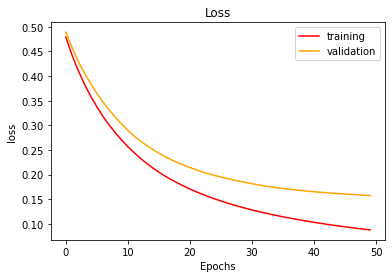

In [20]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

Prva verzija koda je koristila korak učenja 0.001. Na osnovu dobijenog grafika i analize opisane u prethodnoj svesci bili smo motivisani da probamo sa nešto manjim korakom. Probajte i uporedite grafike!  

In [21]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

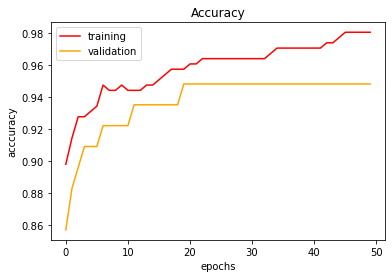

In [22]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

Ovaj grafik ukazuje da se nakon 30te epohe tačnost modela ne unapređuje (tačnost na validacionom skupu stagnira).  

U opštem slučaju, prilikom analize tačnosti klasifikacije možemo se voditi zaključcima prikazanim na slici. <img src='assets/train_val_accuracy.png'>

Kombinujući oba grafika opredelićemo se za treniranje finalnog modela sa 30 epoha. 

Prokomentarišimo još da se funkciji `fit` može proslediti konkretan skup za validaciju preko parametra `validation_data`.  Njena je moguće kreirati na način na koji smo to radili i do sada, pomoću funkcije `train_test_split` biblioteke `scikit-learn`. 

### Korak 4: Evaluacija mreže

Za odabranu vrednost koraka učenja i broj epoha mreža se sada može istrenirati na celom skupu za učenje, a zatim i oceniti na skupu za testiranje.

In [23]:
final_model = Sequential([
    Input(shape=(number_of_features,)),
    Dense(units=100, activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units=output_size, activation='sigmoid')
])
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 0)

In [24]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

6/6 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9734
Test loss: 0.07968127727508545, test accuracy: 0.9734042286872864


In [25]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

12/12 [==============================] - 0s 955us/step - loss: 0.0836 - accuracy: 0.9843
Train loss: 0.08361492305994034, train accuracy: 0.9842519760131836
